Importing Necessary libray and packages

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the datasets using pandas

In [5]:
card = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There is no any missing value and the datatype are also correct.


In [7]:
card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
card.shape

(284807, 31)

In [9]:
card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Here, 0 => Represent the valid transactions
And   1 => Represent the fraud transactions



In [10]:
fraud = card[card['Class']==1]
valid = card[card['Class']==0]
outlier = len(fraud)/len(valid)
print(outlier)

0.0017304750013189597


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced.

Amount detalis for fraudulent and valid transaction

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

The average money transactions for fraud is more than valid.

# Considering the under sampling

In [13]:
#Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
legit_sample = valid.sample(n=492)

In [14]:
new_data = pd.concat([legit_sample, fraud], axis=0)
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
110149,71701.0,1.091869,-0.368537,0.645720,0.219104,-0.761425,-0.116939,-0.397273,0.219032,0.539451,...,-0.228047,-0.629716,0.137650,0.242465,0.012569,0.823219,-0.065437,-0.001999,36.72,0
154943,103750.0,-0.228680,0.838347,-0.212680,-0.162256,0.819966,-1.402432,0.936903,-0.377280,1.380787,...,0.133031,0.599114,-0.227999,-0.179950,-0.039690,-0.212269,-0.092649,0.113797,38.50,0
257889,158393.0,1.960152,0.099612,-1.868773,0.339388,0.496572,-0.848849,0.272071,-0.268614,0.190729,...,0.262517,0.871449,-0.122175,-0.498537,0.283445,-0.098737,-0.003790,-0.036910,41.88,0
119566,75497.0,-0.805520,-0.361011,3.065278,-0.517714,-1.061751,1.060976,-0.175383,0.277405,-0.165362,...,-0.146856,0.243086,-0.175428,-0.346052,0.319871,-0.247801,-0.043335,-0.138201,94.99,0
260027,159373.0,-7.945444,-12.073613,0.702884,2.226703,5.219731,-4.362608,-6.806702,1.485709,-1.321285,...,0.760603,-1.277059,0.216281,0.810731,-0.843356,-0.069196,0.281427,-1.575022,93.48,0


In [15]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

## Correlation Matrix

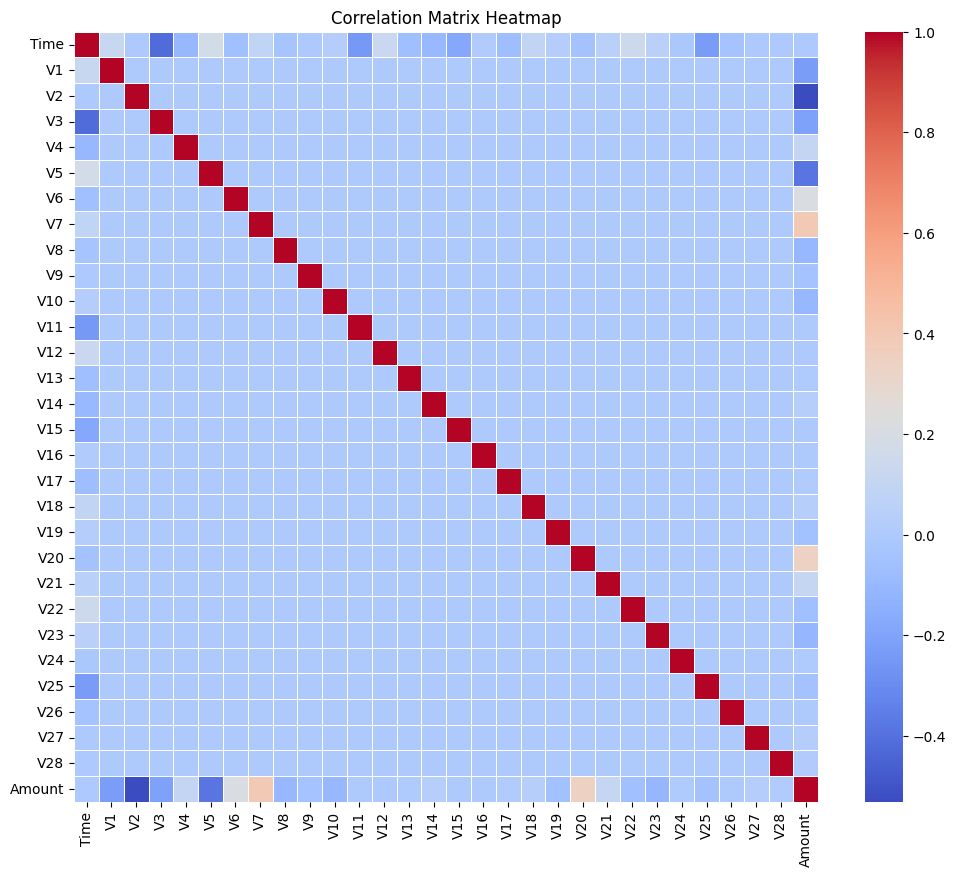

In [16]:
correlation_data = card.drop(columns=['Class'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Separating the values X and Y

In [17]:
# dividing the X and the Y from the dataset
X = new_data.drop(['Class'], axis = 1)
Y = new_data["Class"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(984, 30)
(984,)


## Training and Testing Data

In [18]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

In [23]:
print(xData.shape, xTrain.shape, xTest.shape)

(984, 30) (787, 30) (197, 30)


# Building a random forest model

In [25]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)
# predictions
yPred = rf.predict(xTest)

# Evaluating the model performance

In [26]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))


The model used is Random Forest classifier
The accuracy is 0.9289340101522843
The precision is 0.9772727272727273
The recall is 0.8775510204081632
The F1-Score is 0.9247311827956989


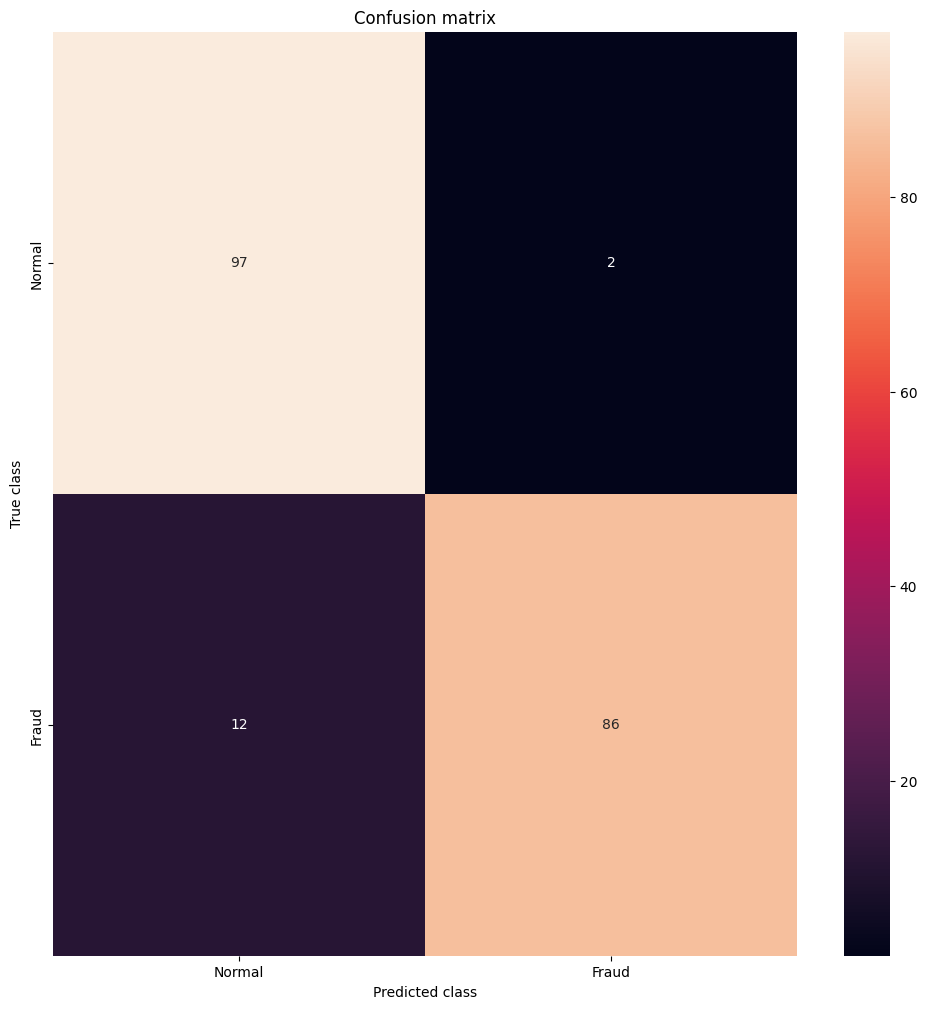

In [27]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [28]:
#classification_report
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

